# Action Learning Final Project
Team:
- DSA-4

Team Members:
- Amey Gawade
- Amir Mobayen
- Gayathri Anandhasayanan

# Libraries

In [35]:
# Basic packages
import numpy as np

# Pandas Libraries
import pandas as pd
import pandas_ta as ta
from pandas._libs.tslibs.offsets import CustomBusinessDay
from pandas.tseries.holiday import USFederalHolidayCalendar

# Plots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as ms

# Tensorflow
import tensorflow as tf

# Sklearn
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Yahoo Finance
import yfinance as yf

tf.get_logger().setLevel('ERROR')

# Fetch Data From Yahoo Finance

In [36]:
# input Parameters
start_date = '2010-01-01'
end_date = '2023-01-01'

stock_market_tickers = ['AAPL', 'NFLX', 'GOOGL']
currency_tickers = ['EURUSD=X']

ticker = 'NFLX'
# Get the data

# Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
data = data.reset_index()
data.head(), data.describe(), data.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3272 non-null   datetime64[ns]
 1   Open       3272 non-null   float64       
 2   High       3272 non-null   float64       
 3   Low        3272 non-null   float64       
 4   Close      3272 non-null   float64       
 5   Adj Close  3272 non-null   float64       
 6   Volume     3272 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 179.1 KB


(        Date      Open      High       Low     Close  Adj Close    Volume
 0 2010-01-04  7.931429  7.961429  7.565714  7.640000   7.640000  17239600
 1 2010-01-05  7.652857  7.657143  7.258571  7.358571   7.358571  23753100
 2 2010-01-06  7.361429  7.672857  7.197143  7.617143   7.617143  23290400
 3 2010-01-07  7.731429  7.757143  7.462857  7.485714   7.485714   9955400
 4 2010-01-08  7.498571  7.742857  7.465714  7.614286   7.614286   8180900,
               Open         High          Low        Close    Adj Close  \
 count  3272.000000  3272.000000  3272.000000  3272.000000  3272.000000   
 mean    188.271939   191.209754   185.193933   188.284766   188.284766   
 std     178.948187   181.470181   176.192694   178.859499   178.859499   
 min       6.960000     7.178571     6.931429     7.018571     7.018571   
 25%      34.642499    35.225715    33.995002    34.668927    34.668927   
 50%     110.110001   112.040001   107.459999   110.114998   110.114998   
 75%     328.790009   33

# Adding Possible Useful Indicators

In [37]:
# The Relative Strength Index (RSI), developed by J. Welles Wilder, is a momentum oscillator that measures the speed and change of price movements.The RSI oscillates between zero and 100. Traditionally the RSI is considered overbought when above 70 and oversold when below 30.
data['RSI'] = ta.rsi(data.Close, length=15)

# The exponential moving average (EMA) is a technical chart indicator that tracks the price of an investment (like a stock or commodity) over time. The EMA is a type of weighted moving average (WMA) that gives more weighting or importance to recent price data.
for i in [8, 20, 50]:
    data[f'EMA_{i}'] = ta.ema(data.Close, length=i)


In [38]:
data_chart = data.copy().tail(200)

# Drop rows with missing values
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA_8,EMA_20,EMA_50
0,2010-03-16,9.935714,10.121429,9.935714,10.090000,10.090000,8498000,66.949523,9.965185,9.648832,8.696343
1,2010-03-17,10.128571,10.248571,10.057143,10.131429,10.131429,4390400,67.627305,10.002128,9.694794,8.752621
2,2010-03-18,10.101429,10.161429,10.062857,10.077143,10.077143,3593100,65.734706,10.018798,9.731208,8.804563
3,2010-03-19,10.100000,10.128571,10.010000,10.064286,10.064286,9905700,65.271200,10.028907,9.762930,8.853964
4,2010-03-22,10.050000,10.428571,10.007143,10.412857,10.412857,7216300,71.175346,10.114229,9.824827,8.915097
...,...,...,...,...,...,...,...,...,...,...,...
3218,2022-12-23,296.179993,298.459991,291.910004,294.959991,294.959991,4251100,49.608470,297.368796,298.527513,286.207563
3219,2022-12-27,293.190002,293.570007,282.130005,284.170013,284.170013,5778100,44.159343,294.435733,297.160132,286.127659
3220,2022-12-28,281.920013,285.190002,273.410004,276.880005,276.880005,5964400,40.906701,290.534460,295.228691,285.765006
3221,2022-12-29,283.179993,295.500000,281.010010,291.119995,291.119995,9588500,48.799527,290.664579,294.837387,285.975005


In [39]:
fig = ms.make_subplots(rows=2, cols=1,
                       shared_xaxes=True,
                       vertical_spacing=0.02)

fig.add_trace(go.Candlestick(x=data_chart.index,
                             open=data_chart['Open'],
                             high=data_chart['High'],
                             low=data_chart['Low'],
                             close=data_chart['Close']))

fig.add_trace(go.Bar(x=data_chart.index, y=data_chart['Volume']),
              row=2, col=1)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Stock Prices'))
fig.update_layout(
    title='Stock Prices History',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Prices ($)')
)
fig.show()

# Pre Processing

In [41]:
n_future = 10  # Number of days we want to look into the future based on the past days.
n_past = 30  # Number of past days we want to use to predict the future.

features = data.columns[1:5]
df_for_training = data[features].astype(float)

scaler = StandardScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)

train_X = np.array([df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]] for i in
                    range(n_past, len(df_for_training_scaled) - n_future + 1)])
train_y = np.array([df_for_training_scaled[i + n_future - 1:i + n_future, 0] for i in
                    range(n_past, len(df_for_training_scaled) - n_future + 1)])

train_X.shape, train_y.shape

((3184, 30, 4), (3184, 1))

# Model

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.RNN(tf.keras.layers.LSTMCell(128), return_sequences=True),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.RNN(tf.keras.layers.LSTMCell(128), return_sequences=True),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(train_y.shape[1]))
])
model.build(input_shape=(None, train_X.shape[1], train_X.shape[2]))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn (RNN)                   (None, 30, 128)           68096     
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 rnn_1 (RNN)                 (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 30, 64)           8256      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 30, 1)            65        
 tributed)                                              

In [43]:
tf.keras.backend.clear_session()

model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.01, nesterov=True, learning_rate=0.01),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.KLDivergence()])

early = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
perf_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                               patience=1)

history = model.fit(train_X, train_y,
                    epochs=40,
                    batch_size=8,
                    validation_split=0.4,
                    verbose=1,
                    callbacks=[early, perf_lr],
                    )


Epoch 1/40
239/239 [==============================] - 5s 14ms/step - loss: 0.0476 - kullback_leibler_divergence: 0.2300 - val_loss: 0.9191 - val_kullback_leibler_divergence: 75.1367 - lr: 0.0100
Epoch 2/40
239/239 [==============================] - 3s 13ms/step - loss: 0.0180 - kullback_leibler_divergence: 0.2121 - val_loss: 0.6815 - val_kullback_leibler_divergence: 56.7323 - lr: 0.0100
Epoch 3/40
239/239 [==============================] - 3s 13ms/step - loss: 0.0135 - kullback_leibler_divergence: 0.1562 - val_loss: 0.6394 - val_kullback_leibler_divergence: 53.7090 - lr: 0.0100
Epoch 4/40
239/239 [==============================] - 3s 13ms/step - loss: 0.0123 - kullback_leibler_divergence: 0.1320 - val_loss: 0.6212 - val_kullback_leibler_divergence: 52.3684 - lr: 0.0100
Epoch 5/40
239/239 [==============================] - 3s 13ms/step - loss: 0.0117 - kullback_leibler_divergence: 0.1345 - val_loss: 0.6076 - val_kullback_leibler_divergence: 51.7351 - lr: 0.0100
Epoch 6/40
239/239 [=====

In [44]:
# model.save('./model/Forcasting')

# Model Evaluation

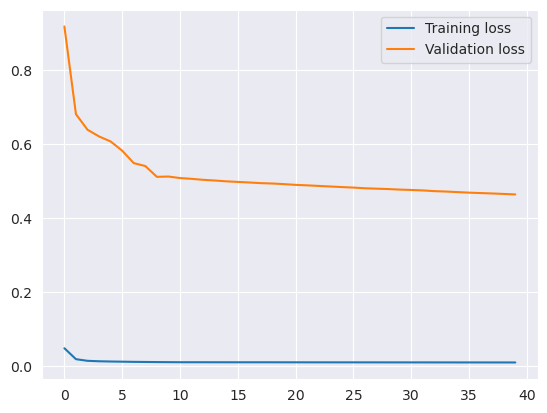

In [45]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [46]:
n_days_for_prediction = 180  #let us predict past 15 days

us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

predict_period_dates = pd.date_range(list(data['Date'])[-1], periods=n_days_for_prediction, freq=us_bd).tolist()

#Make prediction
prediction = model.predict(train_X[-n_days_for_prediction:])  #shape = (n, 1) where n is the n_days_for_prediction


#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
prediction_copies_reshaped = np.reshape(prediction_copies, (-1, df_for_training.shape[1]))
y_pred_future = scaler.inverse_transform(prediction_copies_reshaped)[:, 0]

# Convert timestamp to date
min_length = min(len(predict_period_dates), len(y_pred_future))
forecast_dates = [time_i.date() for time_i in predict_period_dates[:min_length]]

df_forecast = pd.DataFrame({'Date': forecast_dates, 'Open': y_pred_future[:min_length]})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

original = data[['Date', 'Open']]
original['Date'] = pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-05-01']


6/6 [==============================] - 0s 7ms/step


/tmp/ipykernel_35875/3380746488.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
import plotly.graph_objects as go

graph_start_date = '2023-01-01'
graph_end_date = '2023-07-07'
graph_data = yf.download(ticker, start=graph_start_date, end=graph_end_date, interval='1d')

# Assuming original and df_forecast are pandas DataFrame objects

# Plotting the original data
fig = go.Figure(data=go.Scatter(x=original['Date'], y=original['Open'], mode='lines', name='Original'))
fig.add_trace(go.Scatter(x=graph_data.index, y=graph_data['Open'], mode='lines', name='Actual Prices'))

# Adding the forecasted data to the plot
fig.add_trace(go.Scatter(x=df_forecast['Date'], y=df_forecast['Open'], mode='lines', name='Forecast'))

# Updating the layout of the plot
fig.update_layout(title='Open Prices Over Time',
                  xaxis_title='Date',
                  yaxis_title='Open Price')

# Displaying the plot
fig.show()


[*********************100%***********************]  1 of 1 completed
